In [1]:
import uproot

import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

In [3]:
DEUTERONS = '/Users/user/data/research/proton-deuteron/deuterons/hist_bbox_100a_RecoBBox100A_20250815T154454.root'
PROTONS = '/Users/user/data/research/proton-deuteron/protons/hist_bbox_100a_RecoBBox100A_20250815T193002.root'

In [5]:
d = uproot.open(DEUTERONS)
p = uproot.open(PROTONS)

deut = d['anatree/anatree;1']
prot = p['anatree/anatree;4']

deuterons = deut.arrays(['run', 'subrun', 'event', 'trkdedx', 'trkrr', "hit_x", "hit_y", "hit_z", "hit_trkid"], library='pd')
protons = prot.arrays(['run', 'subrun', 'event', 'trkdedx', 'trkrr', "hit_x", "hit_y", "hit_z", "hit_trkid"], library='pd')

deuterons = deuterons[~deuterons.map(lambda x: isinstance(x, list) and len(x) == 0).any(axis=1)].reset_index()
deuterons = deuterons[deuterons['trkdedx'].apply(lambda x: isinstance(x, list) and len(x) == 1)].reset_index(drop=True)

protons = protons[~protons.map(lambda x: isinstance(x, list) and len(x) == 0).any(axis=1)].reset_index()
protons = protons[protons['trkdedx'].apply(lambda x: isinstance(x, list) and len(x) == 1)].reset_index(drop=True)

In [16]:
plane = 0                                           # 0 - induction, 1 - collection

deutdedx = []
deutrr = []
for i in range(len(deuterons)):
    d = ak.to_numpy(deuterons['trkdedx'][i][0][0])
    r = ak.to_numpy(deuterons['trkrr'][i][0][0])
    mask = (d != -99999) & (r != -99999)
    d = d[mask]
    r = r[mask]
    deutdedx.extend(d)
    deutrr.extend(r)

protdedx = []
protrr = []
for i in range(len(protons)):
    d = ak.to_numpy(protons['trkdedx'][i][0][0])
    r = ak.to_numpy(protons['trkrr'][i][0][0])
    mask = (d != -99999) & (r != -99999)
    d = d[mask]
    r = r[mask]
    protdedx.extend(d)
    protrr.extend(r)

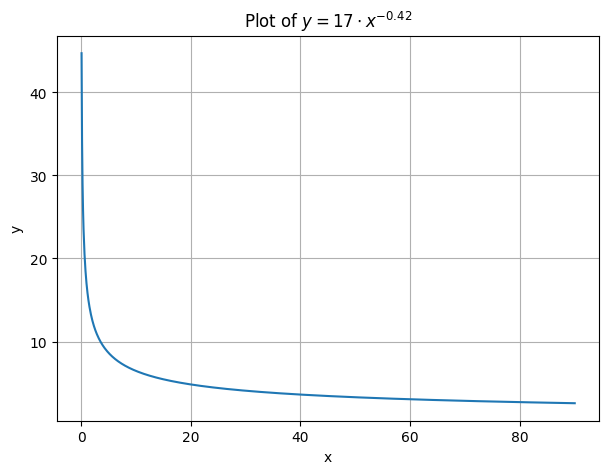

In [17]:
A = 17
b = -0.42

x = np.linspace(0.1, 90, 1000)  # Avoid x=0 for negative exponent
y = A * x**b

plt.figure(figsize=(7,5))
plt.plot(x, y, label=r"$y = 17 \cdot x^{-0.42}$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of $y = 17 \cdot x^{-0.42}$")
plt.grid(True)

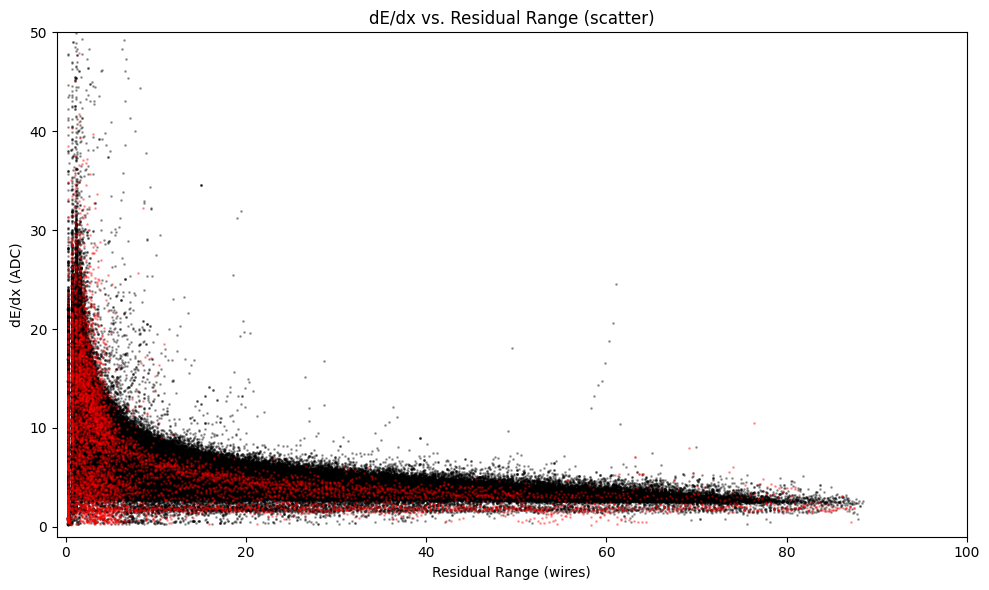

In [19]:
plt.figure(figsize=(10, 6))

plt.scatter(protrr, protdedx, s=1, alpha=0.3, marker='o', color='black')
plt.scatter(deutrr, deutdedx, s=1, alpha=0.3, marker='o', color='red')

# plt.plot(x, y, label=r"$y = 17 \cdot x^{-0.42}$", color='r')
plt.xlabel('Residual Range (wires)')
plt.ylabel('dE/dx (ADC)')
plt.ylim(-1, 50)
plt.xlim(-1, 100)
plt.title('dE/dx vs. Residual Range (scatter)')
plt.tight_layout()
plt.show()